In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression

In [2]:
NE_prices_avg = pd.read_csv('E:\\OtherCodeProjects\\Springboard Capstone Projects\\Springboard-Capstone-2-Data\\Niger_food_prices.csv')
NE_prices_avg.head()

,date,days,Maize - Retail,Rice (imported) - Retail,Sorghum - Retail,Millet - Retail,Beans (niebe) - Retail
0,1990-01-01,7305.0,NaN,201.666667,57.750000,61.00,NaN
1,1990-02-01,7336.0,NaN,201.666667,54.250000,63.40,NaN
2,1990-03-01,7364.0,NaN,201.666667,54.750000,65.20,NaN
3,1990-04-01,7395.0,NaN,202.333333,55.500000,69.60,NaN
4,1990-05-01,7425.0,NaN,202.333333,49.666667,63.25,NaN


In [3]:
NE_prices_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      379 non-null    object 
 1   days                      379 non-null    float64
 2   Maize - Retail            329 non-null    float64
 3   Rice (imported) - Retail  379 non-null    float64
 4   Sorghum - Retail          379 non-null    float64
 5   Millet - Retail           379 non-null    float64
 6   Beans (niebe) - Retail    210 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.9+ KB


In [4]:
NE_prices_avg['date'] = pd.to_datetime(NE_prices_avg['date'])
NE_prices_avg['date'].dtype

dtype('<M8[ns]')

In [5]:
NE_prices_avg.describe(include='all')

C:\Users\William\AppData\Local\Temp\ipykernel_20936\2483228287.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  NE_prices_avg.describe(include='all')


,date,days,Maize - Retail,Rice (imported) - Retail,Sorghum - Retail,Millet - Retail,Beans (niebe) - Retail
count,379,379.000000,329.000000,379.000000,379.000000,379.000000,210.000000
unique,379,NaN,NaN,NaN,NaN,NaN,NaN
top,1990-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,1990-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13056.860158,183.720155,358.604192,157.184086,164.053058,242.776203
std,NaN,3334.503386,50.463660,100.458881,62.116393,65.912217,95.826828
min,NaN,7305.000000,58.250000,175.000000,45.666667,51.600000,93.583333
25%,NaN,10181.000000,141.737500,294.083333,111.500000,105.832317,176.108599


In [6]:
NE_prices_avg.set_index('days', inplace=True)
NE_prices_avg.head()

,date,Maize - Retail,Rice (imported) - Retail,Sorghum - Retail,Millet - Retail,Beans (niebe) - Retail
days,,,,,,
7305.0,1990-01-01,NaN,201.666667,57.750000,61.00,NaN
7336.0,1990-02-01,NaN,201.666667,54.250000,63.40,NaN
7364.0,1990-03-01,NaN,201.666667,54.750000,65.20,NaN
7395.0,1990-04-01,NaN,202.333333,55.500000,69.60,NaN
7425.0,1990-05-01,NaN,202.333333,49.666667,63.25,NaN


In [7]:
NE_prices_avg['Millet-Percent'] = NE_prices_avg['Millet - Retail'].pct_change()
NE_prices_avg.head()

,date,Maize - Retail,Rice (imported) - Retail,Sorghum - Retail,Millet - Retail,Beans (niebe) - Retail,Millet-Percent
days,,,,,,,
7305.0,1990-01-01,NaN,201.666667,57.750000,61.00,NaN,NaN
7336.0,1990-02-01,NaN,201.666667,54.250000,63.40,NaN,0.039344
7364.0,1990-03-01,NaN,201.666667,54.750000,65.20,NaN,0.028391
7395.0,1990-04-01,NaN,202.333333,55.500000,69.60,NaN,0.067485
7425.0,1990-05-01,NaN,202.333333,49.666667,63.25,NaN,-0.091236


In [59]:
x1 = list(NE_prices_avg['Millet - Retail'].values)[1:-1]
x2 = list(NE_prices_avg['Millet - Retail'].values)[:-2]
y = list(NE_prices_avg['Millet - Retail'].values)[2:]

X = [list(row) for row in zip(x1, x2)]

In [57]:
len(X)

377

In [62]:
len(y)

377

ValueError: x and y must be the same size

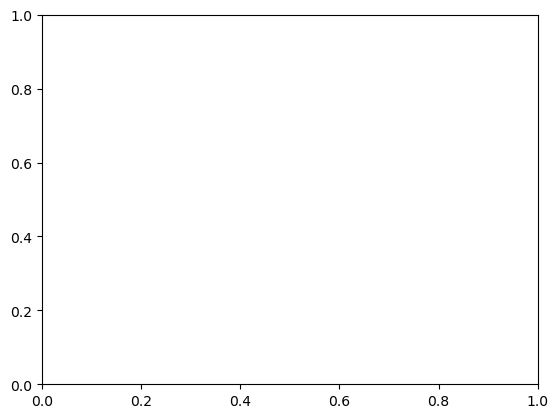

In [61]:
plt.scatter(X, y)
plt.show()

In [63]:
LR = LinearRegression()

LR.fit(X, y)

y_pred = LR.predict(X)

In [64]:
LR.score(X, y)

0.9572540775597417

In [65]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y_pred - y)**2))
    

In [69]:
rmse(y, y_pred) 

13.558522394893785

: 

In [67]:
LR.coef_

array([ 1.40409262, -0.44131317])

In [68]:
LR.intercept_

6.456230500830912

In [26]:
train = NE_prices_avg[NE_prices_avg['date'].dt.strftime('%Y') < '2020']
test = NE_prices_avg[NE_prices_avg['date'].dt.strftime('%Y') >= '2020']

In [27]:
X_train, X_test = train.index, test.index
y_train, y_test = train['Millet - Retail'], test['Millet - Retail']

In [30]:
X_train, X_test = X_train.reshape(-1, 1), X-test.reshape(-1, 1)

AttributeError: 'Float64Index' object has no attribute 'reshape'

In [28]:
X_test.head()

AttributeError: 'Float64Index' object has no attribute 'head'

<AxesSubplot: xlabel='days'>

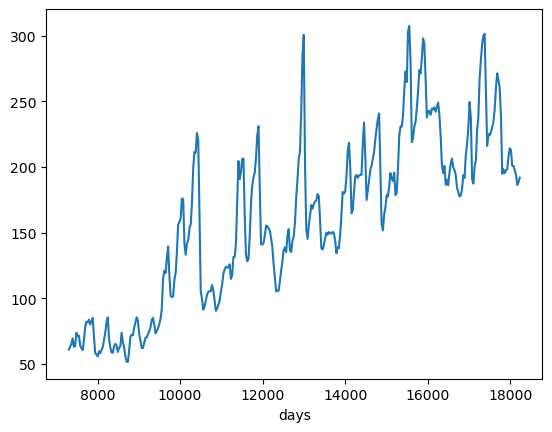

In [22]:
y_train.plot()

In [29]:
LR = LinearRegression()

LR.fit(X_train, y_train)

train_predict = LR.predict(X_train)
test_predict = LR.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 7305.  7336.  7364.  7395.  7425.  7456.  7486.  7517.  7548.  7578.
  7609.  7639.  7670.  7701.  7729.  7760.  7790.  7821.  7851.  7882.
  7913.  7943.  7974.  8004.  8035.  8066.  8095.  8126.  8156.  8187.
  8217.  8248.  8279.  8309.  8340.  8370.  8401.  8432.  8460.  8491.
  8521.  8552.  8582.  8613.  8644.  8674.  8705.  8735.  8766.  8797.
  8825.  8856.  8886.  8917.  8947.  8978.  9009.  9039.  9070.  9100.
  9131.  9162.  9190.  9221.  9251.  9282.  9312.  9343.  9374.  9404.
  9435.  9465.  9496.  9527.  9556.  9587.  9617.  9648.  9678.  9709.
  9740.  9770.  9801.  9831.  9862.  9893.  9921.  9952.  9982. 10013.
 10043. 10074. 10105. 10135. 10166. 10196. 10227. 10258. 10286. 10317.
 10347. 10378. 10408. 10439. 10470. 10500. 10531. 10561. 10592. 10623.
 10651. 10682. 10712. 10743. 10773. 10804. 10835. 10865. 10896. 10926.
 10957. 10988. 11017. 11048. 11078. 11109. 11139. 11170. 11201. 11231.
 11262. 11292. 11323. 11354. 11382. 11413. 11443. 11474. 11504. 11535.
 11566. 11596. 11627. 11657. 11688. 11719. 11747. 11778. 11808. 11839.
 11869. 11900. 11931. 11961. 11992. 12022. 12053. 12084. 12112. 12143.
 12173. 12204. 12234. 12265. 12296. 12326. 12357. 12387. 12418. 12449.
 12478. 12509. 12539. 12570. 12600. 12631. 12662. 12692. 12723. 12753.
 12784. 12815. 12843. 12874. 12904. 12935. 12965. 12996. 13027. 13057.
 13088. 13118. 13149. 13180. 13208. 13239. 13269. 13300. 13330. 13361.
 13392. 13422. 13453. 13483. 13514. 13545. 13573. 13604. 13634. 13665.
 13695. 13726. 13757. 13787. 13818. 13848. 13879. 13910. 13939. 13970.
 14000. 14031. 14061. 14092. 14123. 14153. 14184. 14214. 14245. 14276.
 14304. 14335. 14365. 14396. 14426. 14457. 14488. 14518. 14549. 14579.
 14610. 14641. 14669. 14700. 14730. 14761. 14791. 14822. 14853. 14883.
 14914. 14944. 14975. 15006. 15034. 15065. 15095. 15126. 15156. 15187.
 15218. 15248. 15279. 15309. 15340. 15371. 15400. 15431. 15461. 15492.
 15522. 15553. 15584. 15614. 15645. 15675. 15706. 15737. 15765. 15796.
 15826. 15857. 15887. 15918. 15949. 15979. 16010. 16040. 16071. 16102.
 16130. 16161. 16191. 16222. 16252. 16283. 16314. 16344. 16375. 16405.
 16436. 16467. 16495. 16526. 16556. 16587. 16617. 16648. 16679. 16709.
 16740. 16770. 16801. 16832. 16861. 16892. 16922. 16953. 16983. 17014.
 17045. 17075. 17106. 17136. 17167. 17198. 17226. 17257. 17287. 17318.
 17348. 17379. 17410. 17440. 17471. 17501. 17532. 17563. 17591. 17622.
 17652. 17683. 17713. 17744. 17775. 17805. 17836. 17866. 17897. 17928.
 17956. 17987. 18017. 18048. 18078. 18109. 18140. 18170. 18201. 18231.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.